<a href="https://colab.research.google.com/github/s3965610/COSC2671-A2/blob/asif_community_detection/community_detection_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
from pandas import json_normalize
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import networkx as nx

In [2]:
# directory must be changed to local from google drive
with open("/content/drive/MyDrive/data/user_info.json", "r") as read_file:
    user_infos = json.load(read_file)


In [15]:
user_infos

{'jheins3': {'data': {'user': {'bio': 'Mechanical Engineer in-process',
    'company': None,
    'createdAt': '2013-09-30T21:33:37Z',
    'commitComments': {'totalCount': 0},
    'followers': {'totalCount': 3},
    'following': {'totalCount': 10},
    'gists': {'totalCount': 0},
    'isGitHubStar': False,
    'isHireable': True,
    'isEmployee': False,
    'isDeveloperProgramMember': False,
    'isCampusExpert': False,
    'isBountyHunter': False,
    'location': 'Valparaiso, Indiana',
    'repositories': {'totalCount': 11,
     'nodes': [{'primaryLanguage': None,
       'repositoryTopics': {'nodes': []},
       'labels': {'nodes': [{'name': 'bug'},
         {'name': 'duplicate'},
         {'name': 'enhancement'},
         {'name': 'invalid'},
         {'name': 'question'},
         {'name': 'wontfix'}]}},
      {'primaryLanguage': {'name': 'Python'},
       'repositoryTopics': {'nodes': []},
       'labels': {'nodes': [{'name': 'bug'},
         {'name': 'duplicate'},
         {'name'

In [3]:
language_dict = {}
for i in user_infos:
    language_dict[i] = []
    nodes = []
    if( user_infos[i]['data']!= None):
        nodes = user_infos[i]['data']['user']['repositories']['nodes']
        
    for n in nodes:
        if(n['primaryLanguage'] != None):
            
            language_dict[i].append(n['primaryLanguage']['name'])
        
 
        # language_dict[i].append(n['primaryLanguage']['name'])


In [ ]:
language_dict

In [5]:
languages = []
for key, val in language_dict.items():
    language_dict[key] = set(val)
    languages.extend(val)

In [28]:
languages = set(languages)

In [9]:
len(set(users))

2088

In [22]:
import community
import random
import csv

In [18]:
G = nx.Graph()

# TODO: Remember to import matplotlib.pyplot
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle
import random
# TODO: for you to complete!
# use networkx to draw

users = random.sample(list(language_dict.keys()), 200)
print(users)
count = 0
for i in range(len(users) - 1):
    user = users[i]
    for j in range(i + 1, len(users)):
        user2 = users[j]
        common_languages = language_dict[user].intersection(language_dict[user2])
        if(len(common_languages) > 0):
            count += 1
            G.add_edge(user,  user2, weight = len(common_languages))


['ghiewa', 'mbarbierato', 'monmonmon', 'xdef', 'japyles', 'NileshPatel17', 'sleepycodernotes', 'thekitp', 'marcinguy', 'sharp', 'CaderAhamed', 'WildGenie', '0xWDG', 'Aha-run', 'Dawn13', 'v-goncharenko', 'lemeurherve', 'sthfrnth', 'tulipelover', 'lioncash', 'oba2311', 'janus1999', 'skmezanul', 'sebastien247', 'sharpglasses', 'jackyzq', 'servdezigner', 'saipraveen-a', 'lisai9093', 'dipanksaha', 'hellerbarde', 'julionc', 'Subv', 'ivo4j', 'folkevil', 'AustinColby', 'TurnOffNOD', 'hohenner', 'mrsinguyen', 'akasata', 'azaharizaman', 'gotin', 'neixlo', 'saroj990', 'puleen', 'yuriyvolkov', 'FYYKX', 'Nliver', 'cjeight', 'esr', 'avatarf', 'jenny2403', 'DevJasper', 'grimen', 'ulRRiBlppie', 'jetrois', 'q4323636', 'godfather20', 'elmimouni', 'daydreamman', 'goto99', 'pphuth', 'zhenqinshang', 'PhreakHeaven', 'gogones', 'twittner', 'Pradeep2002-SW', 'fkrasnov', 'kaztraz', 'fakegit', 'cshlittle', 'chadboyda', 'aasim', 'csupxh', 'kinhtkblbp', 'conyer982', 'DarthDobber', 'kamoljan', 'DaffyDuke', 'abebur

In [24]:
from community import community_louvain

In [25]:
partition = community_louvain.best_partition(G)
print('Modularity: ', community_louvain.modularity(partition, G))

Modularity:  0.12252097880482339


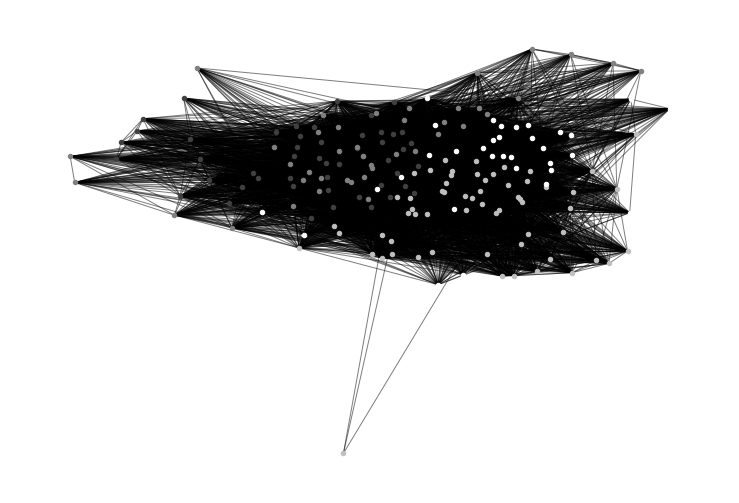

In [26]:
# code reference: https://www.kaggle.com/code/kevinvdsk/community-detection

# Draw graph
plt.figure(figsize=(13, 9))
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0
for com in set(partition.values()) :
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(count / size))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.axis('off')
plt.show()



In [36]:
partition.values()

dict_values([0, 1, 2, 3, 3, 3, 2, 2, 1, 3, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 0, 2, 3, 0, 1, 0, 1, 1, 3, 2, 3, 0, 2, 3, 2, 0, 2, 2, 3, 0, 1, 3, 2, 1, 1, 0, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 1, 0, 0, 2, 0, 3, 3, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 3, 3, 3, 0, 2, 0, 2, 1, 2, 0, 2, 3, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 3, 0, 1, 0, 0, 1, 2, 2, 3, 0, 1, 2, 3, 2, 0, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 3, 2, 2, 2, 0, 2, 3, 0, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2])

In [30]:
centers = {}
communities = {}
G_main_com = G.copy()
min_nb = 30
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    if len(list_nodes) < min_nb:
        G_main_com.remove_nodes_from(list_nodes)
    else:
        
        H = G_main_com.subgraph(list_nodes)
        d_c = nx.degree_centrality(H)
        center = max(d_c, key=d_c.get)
        centers[center] = com
        communities[com] = center
        
        print('Community of ', center , '(ID ', com, ') - ', len(list_nodes), ' users:')
        print(list_nodes, '\n')

Community of  arunkumarpatange (ID  0 ) -  50  users:
['ghiewa', 'lemeurherve', 'lioncash', 'saipraveen-a', 'hellerbarde', 'ivo4j', 'gotin', 'FYYKX', 'jenny2403', 'godfather20', 'csupxh', 'kinhtkblbp', 'kamoljan', 'edardev', 'LotSX', 'bchar', 'vaniot-s', 'buondoi', 'songco', 'salespaulo', 'suvamM', 'Zypan', 'zhkuang', 'miuirussia', 'ilyi1116', 'arunkumarpatange', 'HUFGhani', 'JasonHaenlin', 'ljyong2010', 'topofocus', 'danba340', 'lougxing', 'trycatcher', 'thanhngocnguyenvpt', 'dominicfarr', 'nekofar', 'heisonyee', 'Baneeishaque', '85pando', 'mks0ff', 'Alexander-Wilms', 'unforgiven512', 'GaryChengld', 'lublak', 'kapong', 'dancetrain', 'atispor', 'mdluex', 'andregironda', 'k2y1982'] 

Community of  kmdtukl (ID  1 ) -  41  users:
['mbarbierato', 'WildGenie', 'skmezanul', 'sharpglasses', 'jackyzq', 'Subv', 'folkevil', 'TurnOffNOD', 'DevJasper', 'jetrois', 'q4323636', 'aasim', 'zerazobz', 'allenbobo', 'ErisDS', 'BookSwapSteve', 'pvels', 'mdelgert', 'jiahengaa', 'rkaiser0324', 'JCBrown602', 

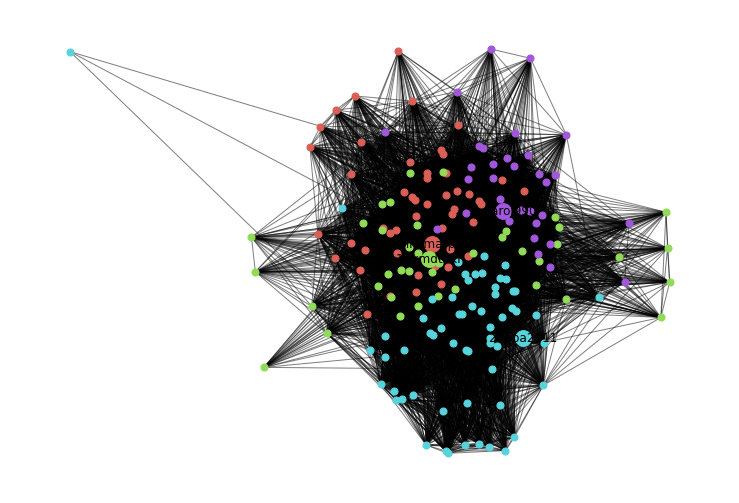

In [33]:
import seaborn as sns
# Display graph
plt.figure(figsize=(13, 9))
node_size = 50
count = 0
pos = nx.spring_layout(G_main_com)
colors = dict(zip(communities.keys(), sns.color_palette('hls', len(communities.keys()))))

for com in communities.keys():
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com and nodes not in communities.values()]
    nx.draw_networkx_nodes(G_main_com, pos, list_nodes, node_size = node_size, node_color = colors[com])
    nx.draw_networkx_nodes(G_main_com, pos, list([communities[com]]), node_size = node_size*5, node_color = colors[com])
nx.draw_networkx_edges(G_main_com, pos, alpha=0.5)
labels = {k: str(v) + ': ' + k for k,v in centers.items()}
nx.draw_networkx_labels(G_main_com, pos, labels)
plt.axis('off')
plt.show()